# Recurrent Neural Network (RNN)

What makes human language and thought so powerful? One key aspect is our ability to maintain context and build understanding across time. When you read a story, each word's meaning depends on what came before it. This fundamental property of sequential information leads us to Recurrent Neural Networks (RNNs).

## Why static embedding falls short

Consider how you understand these two exchanges:
1. "I went to the bank to deposit money."
2. "I went to the bank to catch fish."

The word "bank" has completely different meanings in these two sentences - a financial institution in the first, and a river's edge in the second. This illustrates a crucial point: meaning depends on context. Traditional approaches that produce "static" embeddings struggle with this because the embedding of a word is fixed and does not change based on the context.

## RNN Architectures

```{figure} https://pythongeeks.org/wp-content/uploads/2022/02/types-of-rnn.webp
:width: 600px
:align: center

Different RNN architectures showing various input-output configurations. The image is taken from https://pythongeeks.org/recurrent-neural-network

```

Recurrent Neural Networks (RNNs) are flexible models that can handle various sequential data tasks through different architectures. Here are the main types:

The **one-to-many** architecture takes a single input and produces a sequence of outputs. For example, in image captioning, one image generates multiple words describing it. The RNN uses the input to initialize its state and generates the output sequence step by step.

The **many-to-one** architecture processes a sequence to generate one output. A common application is sentiment analysis, where the RNN reads multiple words to determine if the sentiment is positive or negative. The network combines information from the entire sequence for the final prediction.

The **many-to-many** architecture handles sequences for both input and output. **Machine translation** is a prime example - it converts a sequence of words in one language to a sequence in another language, with each input word influencing the entire output sequence.


## Reccurrent Neural Network

### The Core Idea

Imagine reading a book while maintaining a "summary" in your mind that you update with each new sentence. This is similar to how RNNs work. Operationally, RNNs process a sequence of inputs $(x_1, x_2, \ldots, x_T)$ one at a time, updating a *hidden state* $h_t$ that acts as a "working memory" that captures information from previous inputs.

$$ h_t = f(x_t, h_{t-1}) $$

This formula captures the essence of RNNs: the current hidden state ($h_t$) depends on both the current input ($x_t$) and the previous hidden state ($h_{t-1}$).
Function $f$ is a neural network that takes the current input and the previous hidden state as input and outputs the current hidden state.

```{note}
Think of the hidden state as a "working memory" that's constantly being updated. Just as you might remember key plot points while reading a novel but forget minor details, the hidden state learns to maintain relevant information for the task at hand.
```

### Model

```{figure} ../figs/rnn.jpg
:alt: RNN Model
:width: 500px
:align: center

A recurrent neural network (RNN) showing both architectural views. Left: Compact representation where NN processes input $x_t \in \mathbb{R}^n$ and hidden state $h_t \in \mathbb{R}^d$ to produce output $o_t \in \mathbb{R}^m$. Right: Expanded view showing the concatenation $[x_t, h_{t-1}]$, linear transformations ($W, b_h$), and $\tanh$ activation. Colors indicate corresponding components: inputs (blue), hidden states (green), outputs (pink), and transformations (yellow).
```

The forward pass of an RNN processes sequential data through a series of transformations as follows:

1. The network takes the current input vector $x_t \in \mathbb{R}^n$ and transforms it using the input weight matrix $W_{xh} \in \mathbb{R}^{d \times n}$.
    $$
    W_{xh}x_t
    $$

2. Then, it transforms the previous hidden state $h_{t-1} \in \mathbb{R}^d$ using the hidden weight matrix $W_{hh} \in \mathbb{R}^{d \times d}$.
    $$
    W_{hh}h_{t-1}
    $$

3. These transformed vectors are added together along with a bias term $b_h \in \mathbb{R}^d$:
    $$
    W_{xh}x_t + W_{hh}h_{t-1} + b_h
    $$

4. The network applies the $\tanh$ activation function to the result:
    $$
    \tanh(W_{xh}x_t + W_{hh}h_{t-1} + b_h)
    $$

5. Meanwhil, the output is generated by transforming the hidden state $h_t$ using the output weight matrix $W_{ho} \in \mathbb{R}^{m \times d}$:
    $$
    o_t = W_{ho}h_t + b_o
    $$

   This step produces an output vector $o_t \in \mathbb{R}^m$ that represents the network's prediction or response at the current time step. The hidden state $h_t$ serves as the network's memory, carrying forward relevant information from previous time steps to influence future predictions.

```{note}
The weights ($W_{xh}, W_{hh}, W_{ho}$) are learned during training. The network must figure out:
- How much to trust new information vs. old memory
- Which features are worth remembering
- How to combine information across time
```

```{note}
The $\tanh$ activation function is specifically chosen because:
1. Its output range [-1, 1] helps prevent exploding values
2. Its symmetric nature around zero aids in gradient flow
3. Its smooth, differentiable nature supports stable training
```



### Optimization

RNNs can be trained using backpropagation. One can think of the RNN as a chain of layers, where each layer shares the same weights and takes the previous layer's output as input.

```{figure} ../figs/rnn-expanded.jpg
:alt: RNN expanded
:width: 500px
:align: center

An RNN unrolled through time, showing parameter sharing across timesteps. Each vertical slice represents one timestep, with shared weights $W$ and biases $b$ across all timesteps. This unrolled view illustrates how gradients flow backwards through time during training (BPTT).
```

The learning process in RNNs begins after processing the entire sequence. Once the final output $o_T$ is produced at the end of the sequence, the model evaluates how well it performed by calculating the error between its predictions and the actual values. This error signal then propagates backwards through the network layers in reverse chronological order, from the last layer to the first.

Backpropagation Through Time (BPTT) is how RNNs learn from their mistakes. After calculating the error at the final timestep, the network updates its weights by propagating this error backwards. Through many iterations, the network learns to use information from previous timesteps to make better predictions.

### The Vanishing Gradient Challenge

One of the main challenges RNNs face is called the "vanishing gradient problem". This happens when we try to train RNNs on long sequences of data.

Let's understand this with a simple example. Imagine you're trying to remember a phone number someone is telling you digit by digit. As you hear more digits, it becomes harder to remember the first few digits clearly. RNNs have a similar problem - they struggle to remember information from much earlier in the sequence.

Technically, this happens because of how RNNs learn. When the network is learning, it needs to figure out how much each earlier step contributed to any mistakes it made. This process involves multiplying many small numbers together:

$$ \frac{\partial L}{\partial h_t} = \prod_{i=t}^T \frac{\partial h_{i+1}}{\partial h_i} $$

When you multiply many small numbers (less than 1) together, the result gets very tiny - almost zero! This means the network can barely learn from earlier parts of the sequence.

The opposite can also happen - if the numbers are too large, the result explodes to huge values, which also makes learning impossible.

```{tip}
This limitation led to several important developments:
- Gradient clipping (for explosion)
- Careful initialization
- Alternative architectures (LSTM, GRU)
```

## Hands-on Example

Let us put our hands on the RNN model 🔥. Since the implementation of RNN is a bit complex, I
have implemented it in the `asctools` library. If you are interested in the implementation
details, please refer to the [RNN implementation in the `asctools` library](https://github.
com/skojaku/applied-soft-comp/tree/master/libs/asctools/asctools/rnn.py).
To use the library, please install it by `pip install git+https://github.com/skojaku/applied-soft-comp.git#subdirectory=libs/asctools`.

Let us demonstrate RNN's capability with a task - predicting sine waves 🔥. We will generate two sine waves - one for training and one for testing.

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

# Generate sine wave data
window_size = 15
dt = 0.05
tmax = 50

# Training data
t_data = torch.arange(0, tmax, dt)
sine_wave = torch.sin(t_data).view(-1, 1)

# Testing data
t_ext = torch.arange(tmax, tmax+100, dt)
sine_wave_ext = torch.sin(t_ext).view(-1, 1)

Since the RNN is not good at learning a long sequence, we will chunk the sequence into shorter sequences.

In [2]:
def to_sliding_window_form(sine_wave, window_size):
    X, y = [], []
    for _t in range(len(sine_wave)-window_size-1):
        # Input is current window
        X.append(sine_wave[_t:_t+window_size])
        # Target is next single value
        y.append(sine_wave[_t+window_size])

    X = torch.stack(X)  # Shape: (n_samples, window_size, 1)
    y = torch.stack(y).unsqueeze(1)  # Shape: (n_samples, 1, 1)
    return X, y

X_train, y_train = to_sliding_window_form(sine_wave, window_size)
print("Shape of X_train (number of samples, sequence length, feature size):", X_train.shape)
print("Shape of y_train (number of samples, sequence length, feature size):", y_train.shape)

Shape of X_train (number of samples, sequence length, feature size): torch.Size([984, 15, 1])
Shape of y_train (number of samples, sequence length, feature size): torch.Size([984, 1, 1])


We have generated the training data in the shape of (number of samples, sequence length, feature size).

Let us showcase how to feed the data to the RNN before training. We will use the pre-implemented RNN and RNNTrainer in the `asctools` library.

In [3]:
from asctools.rnn import RNN
from asctools.rnn_trainer import RNNTrainer

rnn = RNN(input_size=1, hidden_size=32, output_size=1)


In PyTorch, `model.eval()` is a method that sets the model to evaluation mode. This is important because it affects the behavior of the model.

In [4]:
rnn.eval()

RNN(
  (i2h): Linear(in_features=33, out_features=32, bias=True)
  (i2o): Linear(in_features=33, out_features=1, bias=True)
  (tanh): Tanh()
)

Now, let's feed the input data to the RNN.

In [5]:
def feed_forward(rnn, seq, hidden):
    for i in range(window_size):
        output, hidden = rnn(seq[i].unsqueeze(0), hidden)
    return output, hidden

Notice that we feed one point at a time to the RNN. The hidden state is updated in each step and is used as the input for the next step. With this, let us feed the data to a sequence of some number of points and predict the next point in the sequence. We do this autoregressively, meaning that we use the value predicted by the RNN at time t as the input for the model to predict the next time point t + 1.

In [6]:
# We use the last training data as an input to the RNN for the initial prediction.
pred_seq = sine_wave[-window_size:].view(-1).tolist()
for _t in range(len(t_ext)):
    # Feed the window sequence to the RNN
    hidden = rnn.initHidden()
    output, hidden = feed_forward(rnn, torch.tensor(pred_seq[_t: _t+window_size]), hidden)
    pred_seq.append(output.squeeze().item())

Let's plot the output sequence and the actual sequence.

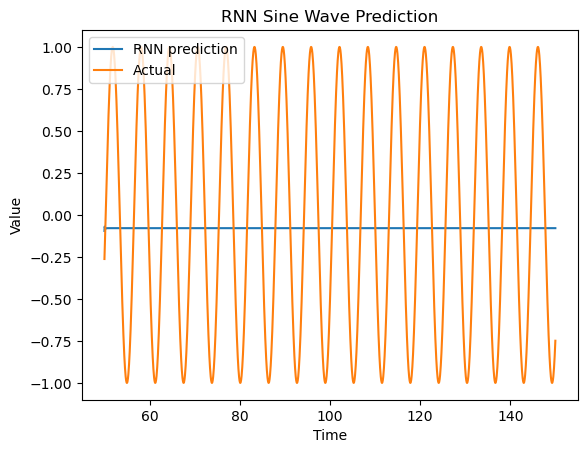

In [7]:
pred_seq = torch.tensor(pred_seq)[window_size:]
plt.plot(t_ext, pred_seq, label='RNN prediction')
plt.plot(t_ext, sine_wave_ext, label='Actual')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('RNN Sine Wave Prediction')
plt.legend()
plt.show()

The output sequence appears to be not aligned with the actual sequence, since we have not trained the model yet. So, let us train the model. To this end, we will use the `RNNTrainer` class in the `asctools` library. This trainer will train the RNN model to predict the next point in the sequence.

In [8]:
from torch import nn
rnn.train()
trainer = RNNTrainer(rnn)
losses = trainer.train(
    input_tensors=X_train, # This is the input sequence.
    targets=y_train, # This is the target sequence.
    hidden_init_func=rnn.initHidden, # This is to initialize the hidden state.
    criterion=nn.MSELoss(), # This is the loss function.
    max_epochs=1000, # This is the maximum number of epochs.
    learning_rate=0.01, # This is the learning rate.
    clip_grad_norm=1.0, # This is to prevent the gradient from exploding or vanishing.
)

/Users/skojaku-admin/miniforge3/envs/advnetsci/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Early stopping at epoch 53


```{tip}
Gradient clipping (`clip_grad_norm`) prevents unstable training in RNNs by limiting how much the model parameters can change in a single update. Think of it as a "speed limit" - without clipping, parameter updates can become too large due to exploding gradients during backpropagation, causing the model to overshoot optimal values. By clipping gradients to a maximum norm (1.0 in this case), we keep updates within a reasonable range and maintain stable training.

![](https://spotintelligence.com/wp-content/uploads/2023/12/gradient-clipping-example.jpg)

```

The `train` function takes the input sequence and returns the losses during training. The `losses` is a list of loss values at each epoch.  It is extremely important to plot the loss to see if the model is learning.
The loss should decrease as the model learns the sine wave pattern.

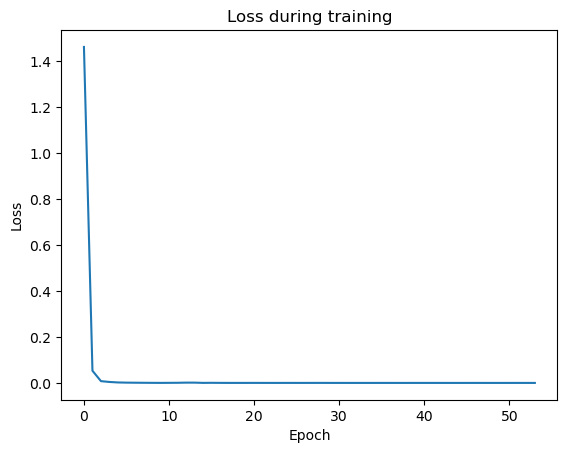

In [9]:
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss during training')
plt.show()

```{tip}
Always label the axes!!!! It is very common that a figure is not self-explanatory due to the lack of labels.
```

Now, let us use the trained model to extrapolate the sine wave.

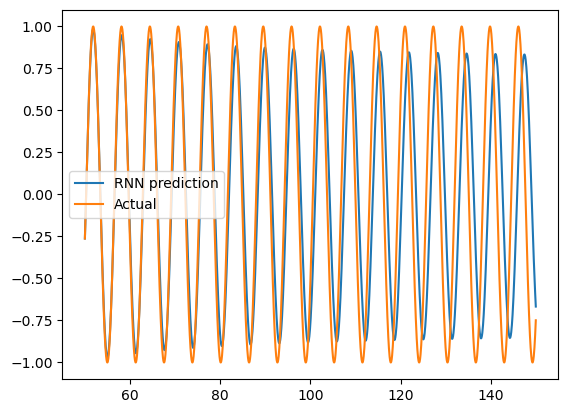

In [10]:
rnn.eval()
pred_seq = sine_wave[-window_size:].view(-1).tolist()
for _t in range(len(t_ext)):
    # Feed the window sequence to the RNN
    hidden = rnn.initHidden()
    output, hidden = feed_forward(rnn, torch.tensor(pred_seq[_t: _t+window_size]), hidden)
    pred_seq.append(output.squeeze().item())

pred_seq = torch.tensor(pred_seq)[window_size:]
plt.plot(t_ext, pred_seq, label='RNN prediction')
plt.plot(t_ext, sine_wave_ext, label='Actual')
plt.legend()
plt.show()

```{tip}
In PyTorch, `.eval()` is a method that sets the model to evaluation mode. Without this, the model might be in training mode, which affects the behavior of the model.
```

We observed that the RNN is able to predict the sine wave with a reasonable accuracy, with errors increasing over time. This is because, at each time step, the RNN made some errors, which were accumulated over time, resulting in a larger error.

## 🔥 Exercise 🔥

1. Turn off the gradient clipping and see how the model performs.

2. Try to predict the sine wave with a longer sequence

3. Change the sequence length and see how the model performs.

4. Create a new dataset and see how the model performs.